# NSRDB on AWS

In [2]:
%matplotlib inline
import h5pyd
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import sys
import time

sys.path.append('../bin')
from functions import HSDS

# Plotting settings
mpl.rcParams['font.sans-serif'] = 'DejaVu Sans'
mpl.rcParams['pdf.fonttype'] = 42
mpl.rc('xtick', labelsize=16) 
mpl.rc('ytick', labelsize=16)
mpl.rc('font', size=16)
sns.set_style("white")
sns.set_style("ticks")

path = '/nrel/nsrdb/nsrdb_2013.h5'
nsrdb = HSDS(path, preload=True)

# path = '/nrel/wtk/conus/wtk_conus_2013.h5'
# wkt = HSDS(path, preload=True)

# Time-series extraction

In [2]:
# Please provide coordinates of interest (latitude, longitude)
coords = (38.885083, -77.024739)  # NREL DC office

ts_df = nsrdb.get_timeseries('ghi', coords)

In [3]:
ts_df = nsrdb.get_timeseries('ghi', coords)

# Extract Day

In [3]:
# Please pick a day in 2013
date = '2013-07-04'

In [4]:
day_df = nsrdb.get_day('ghi', date)
day_df.head()

,57215,57471,57472,57473,57730,57731,57732,57733,57986,57987,...,1465543,1465823,1466180,1466741,1467240,1467490,1468521,1468522,1468878,1469312
8845,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8846,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8847,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8848,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8849,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [33]:
"nsrdb_{:03d}".format(1)

'nsrdb_001'

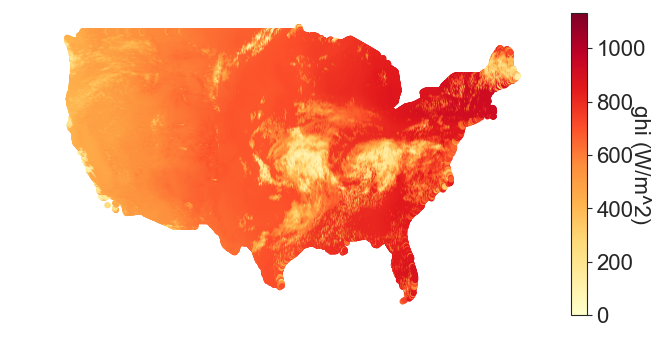

In [32]:
meta = nsrdb.meta.iloc[day_df.columns]
lon = meta['longitude'].values
lat = meta['latitude'].values
i = 18
ts = day_df.iloc[i].values

fig = plt.figure(figsize=(8, 4), dpi=100)
axis = fig.add_subplot(111)
sc = axis.scatter(lon, lat, c=ts, cmap='YlOrRd', s=10,
                  vmin=0, vmax=np.max(day_df.values))
cbar = plt.colorbar(sc)
cbar.ax.set_ylabel('ghi (W/m^2)', rotation=90)
axis.axis('off')
fig.tight_layout()
plt.show()